In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer/breast-cancer.csv


# importing all important libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


from sklearn.preprocessing import StandardScaler

# importing data

In [3]:
train=pd.read_csv('/kaggle/input/breast-cancer/breast-cancer.csv')
train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# checking null values

In [5]:
train.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
train.duplicated().sum()

0

# Visualization for Breast Cancer

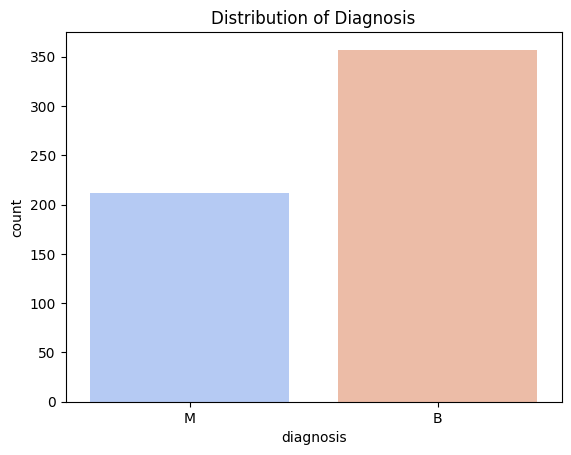

In [7]:
sns.countplot(x='diagnosis', data=train, palette='coolwarm')
plt.title('Distribution of Diagnosis')
plt.show()

**It shows the counts of benign (B) and malignant (M) cases in the dataset. benign (B) have highest number of count**

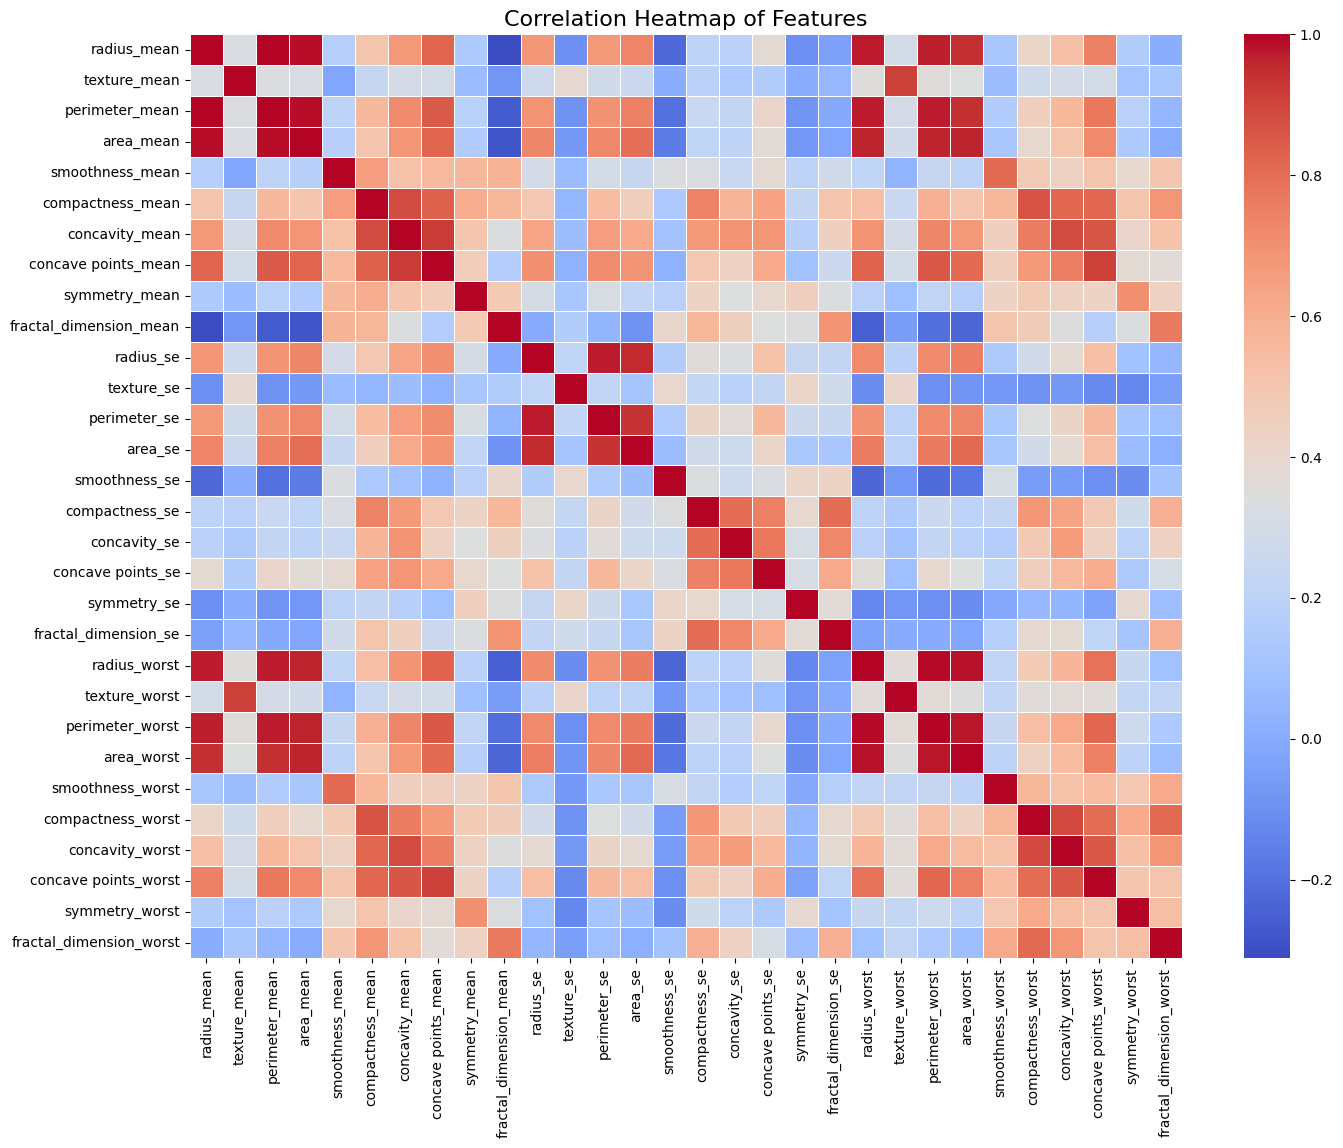

In [8]:
# Compute correlation matrix
correlation_matrix = train.drop(['id', 'diagnosis'], axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

**The heatmap reveals strong correlations among features like radius_mean, perimeter_mean, and area_mean, indicating larger tumors tend to have proportional measurements. Clusters suggest redundancy, suitable for dimensionality reduction. These relationships highlight key predictive features for distinguishing malignant and benign cases, aiding in effective modeling and feature selection.**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


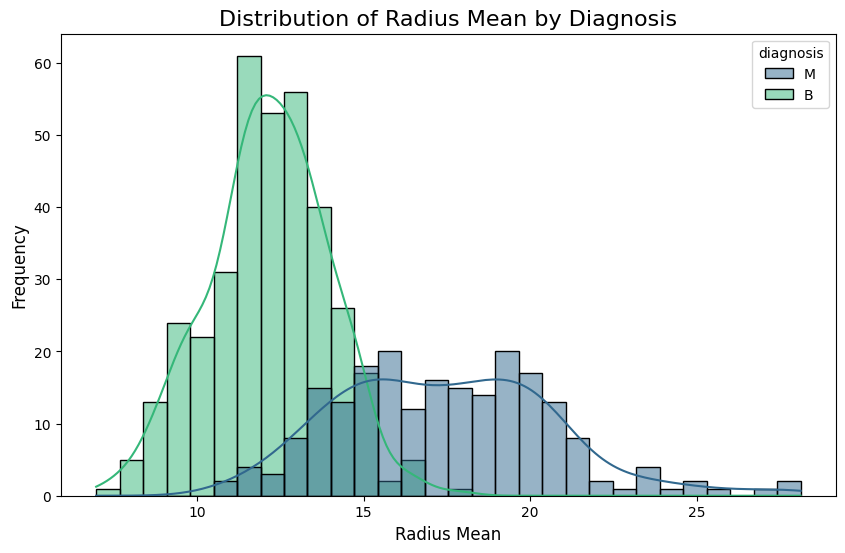

In [9]:
# Visualization 3: Distribution of a Key Feature (e.g., `radius_mean`) by Diagnosis

plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='radius_mean', hue='diagnosis', kde=True, palette='viridis', bins=30)
plt.title('Distribution of Radius Mean by Diagnosis', fontsize=16)
plt.xlabel('Radius Mean', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

**the visualization showing the distribution of radius_mean for benign (B) and malignant (M) diagnoses. It highlights how the radius size differs between the two groups, with malignant cases typically having larger mean radii.**

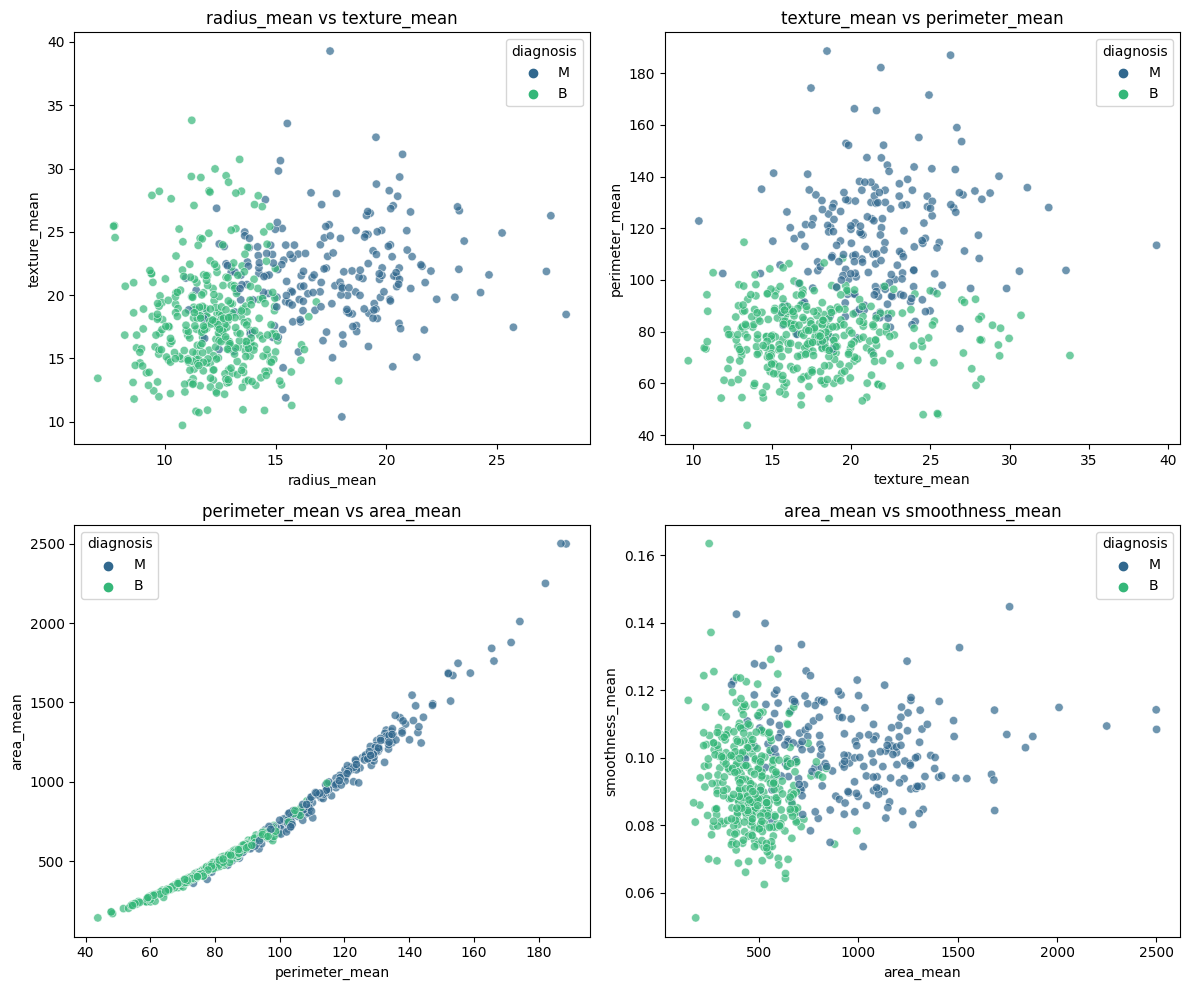

In [10]:
# Alternative: Plot pairwise scatterplots manually for a subset of features
plt.figure(figsize=(12, 10))
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']


# Plot scatterplots for feature pairs
for i, feature in enumerate(selected_features[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(
        data=train, x=feature, y=selected_features[i + 1], hue='diagnosis', palette='viridis', alpha=0.7
    )
    plt.title(f'{feature} vs {selected_features[i + 1]}', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel(selected_features[i + 1], fontsize=10)

plt.tight_layout()
plt.show()


**The scatterplots reveal distinct separations between malignant and benign diagnoses in feature pairs. Malignant cases tend to cluster at higher values for size-related features like radius_mean, perimeter_mean, and area_mean, indicating larger tumor dimensions. The trends suggest these features are crucial for distinguishing between the two diagnoses, aiding classification******

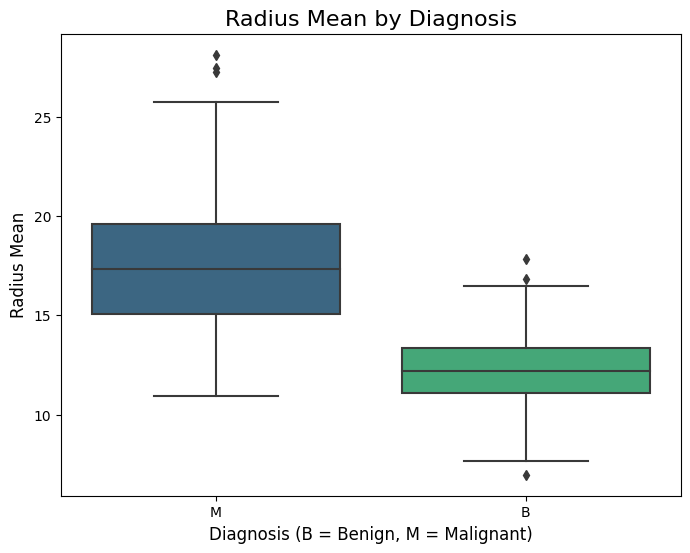

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=train, x='diagnosis', y='radius_mean', palette='viridis')
plt.title('Radius Mean by Diagnosis', fontsize=16)
plt.xlabel('Diagnosis (B = Benign, M = Malignant)', fontsize=12)
plt.ylabel('Radius Mean', fontsize=12)
plt.show()

**the boxplot for radius_mean by diagnosis. It shows that malignant tumors (M) typically have higher radius mean values compared to benign tumors (B), indicating larger tumor sizes for malignant cases.**

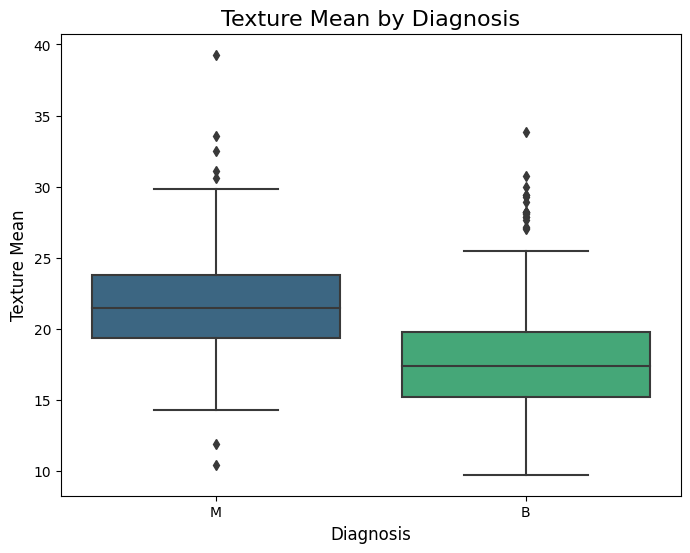

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=train, x='diagnosis', y='texture_mean', palette='viridis')
plt.title('Texture Mean by Diagnosis', fontsize=16)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Texture Mean', fontsize=12)
plt.show()

**Here is the boxplot for texture_mean by diagnosis. It indicates that malignant cases generally have a slightly higher range and median texture values compared to benign cases.**

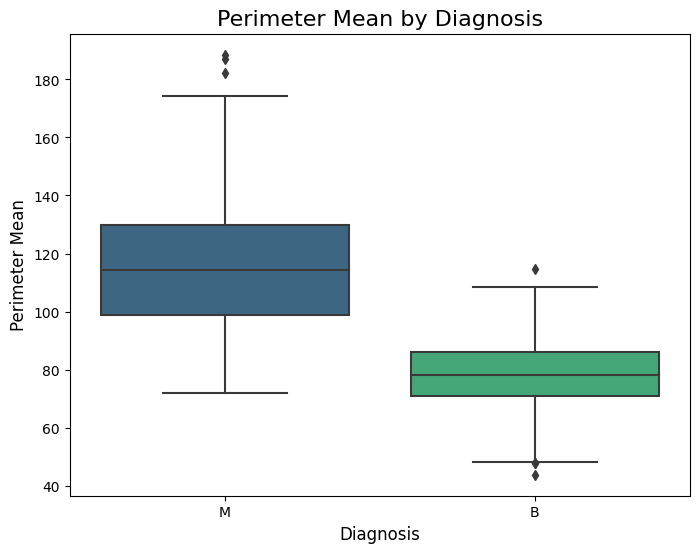

In [13]:
# Visualization 5.3: Boxplot of Perimeter Mean by Diagnosis

plt.figure(figsize=(8, 6))
sns.boxplot(data=train, x='diagnosis', y='perimeter_mean', palette='viridis')
plt.title('Perimeter Mean by Diagnosis', fontsize=16)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Perimeter Mean', fontsize=12)
plt.show()

**the boxplot for perimeter_mean by diagnosis. It shows that malignant tumors tend to have significantly higher perimeter values than benign tumors, further emphasizing size differences.**

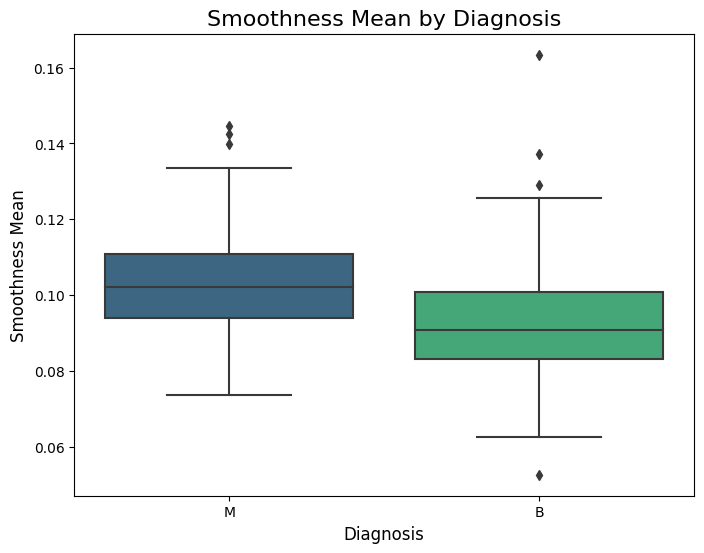

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=train, x='diagnosis', y='smoothness_mean', palette='viridis')
plt.title('Smoothness Mean by Diagnosis', fontsize=16)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Smoothness Mean', fontsize=12)
plt.show()

**the boxplot for smoothness_mean by diagnosis. The distributions for benign and malignant tumors overlap more compared to size-related features, though malignant tumors exhibit slightly higher smoothness on average**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


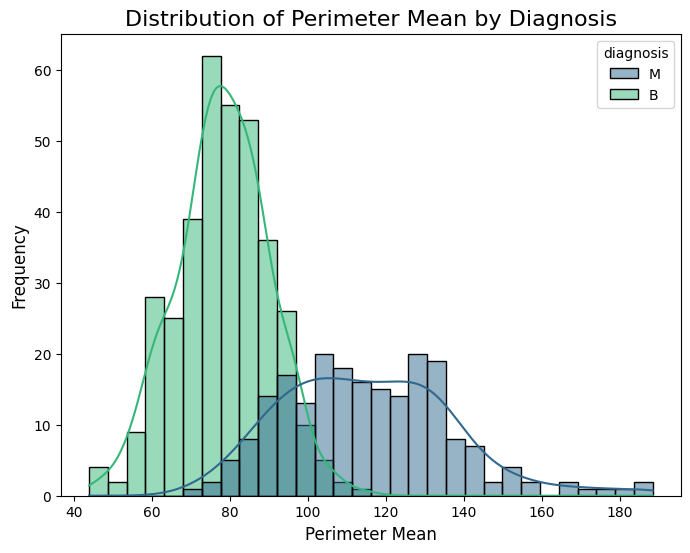

In [15]:
# Visualization 6: Histogram of Perimeter Mean by Diagnosis

plt.figure(figsize=(8, 6))
sns.histplot(data=train, x='perimeter_mean', hue='diagnosis', kde=True, palette='viridis', bins=30)
plt.title('Distribution of Perimeter Mean by Diagnosis', fontsize=16)
plt.xlabel('Perimeter Mean', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

**the histogram for perimeter_mean grouped by diagnosis. It illustrates that malignant tumors tend to have higher perimeter values compared to benign tumors, with a distinct separation in their distributions**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


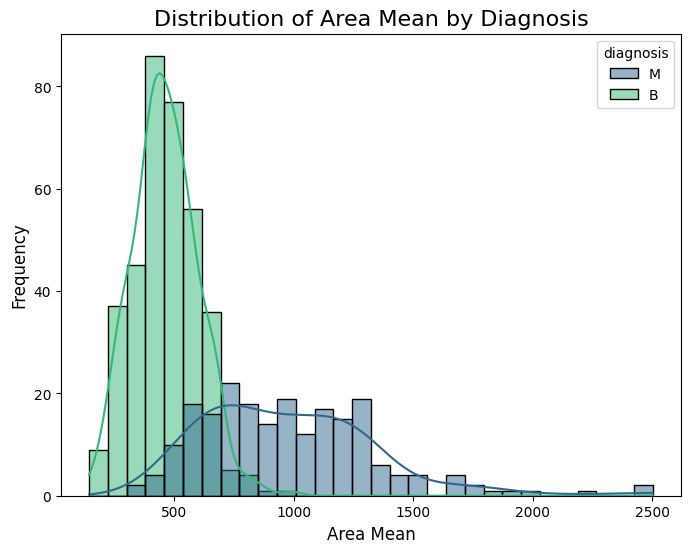

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(data=train, x='area_mean', hue='diagnosis', kde=True, palette='viridis', bins=30)
plt.title('Distribution of Area Mean by Diagnosis', fontsize=16)
plt.xlabel('Area Mean', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

**the histogram for area_mean grouped by diagnosis. Malignant tumors show a tendency for significantly higher area values compared to benign tumors, with a notable separation in their distributions**

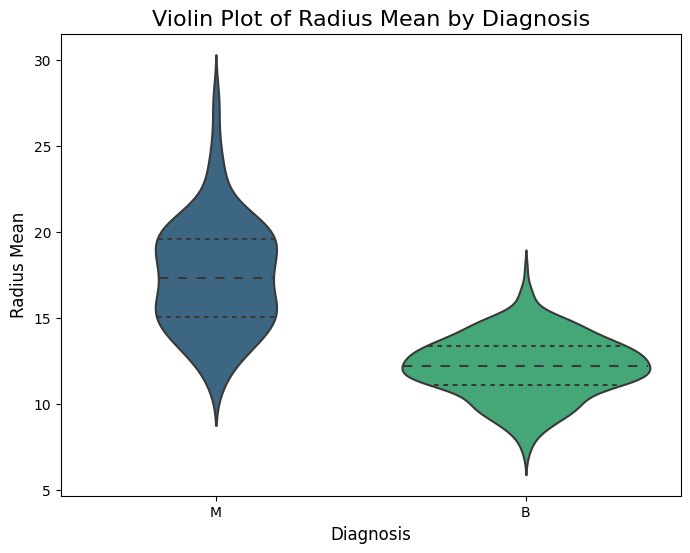

In [17]:
# Visualization 8: Violin Plot of Radius Mean by Diagnosis

plt.figure(figsize=(8, 6))
sns.violinplot(data=train, x='diagnosis', y='radius_mean', palette='viridis', inner='quartile')
plt.title('Violin Plot of Radius Mean by Diagnosis', fontsize=16)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Radius Mean', fontsize=12)
plt.show()

**the violin plot for radius_mean by diagnosis. It visualizes the full distribution of radius_mean, showing that malignant tumors have higher values with a wider spread compared to benign tumors. The quartile lines within the violin plot provide additional insights into the data distribution**

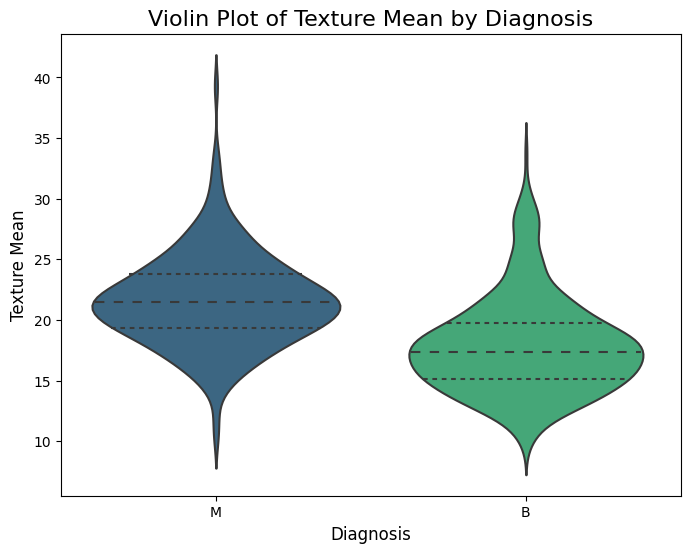

In [18]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=train, x='diagnosis', y='texture_mean', palette='viridis', inner='quartile')
plt.title('Violin Plot of Texture Mean by Diagnosis', fontsize=16)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Texture Mean', fontsize=12)
plt.show()

# Features Selection 

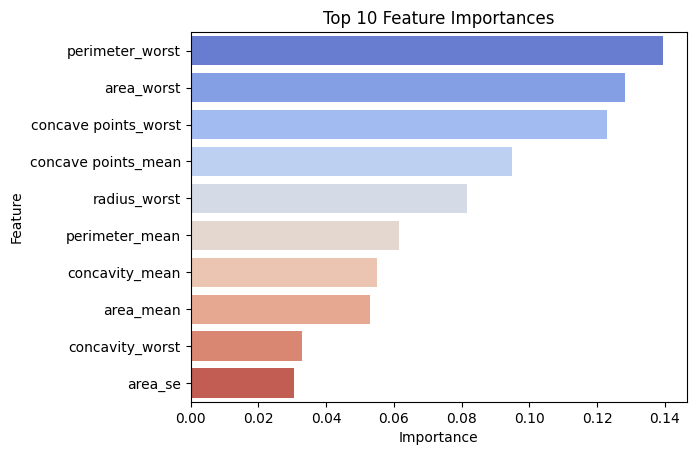

In [19]:
x =train.drop(['diagnosis','id'], axis=1)
y = train['diagnosis']

target = y.map({'M': 1, 'B': 0})  

model = RandomForestClassifier()
model.fit(x, y)

importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance.head(10), palette='coolwarm')
plt.title('Top 10 Feature Importances')
plt.show()

# Splitting Data into train and test

In [20]:
x=train.drop(['diagnosis','id'], axis=1)
y = train['diagnosis']